# 1. Digital Recognizer

## a) Import MNIST data set

In [1]:
import pandas as pd
mnist_train_file = open("/Users/zweedaothaiduy/Dropbox/Document/Study/Cornell Modules/Applied Machine Learning ECE5414/homework-1/digit-recognizer/train.csv")
mnist_test_file = open("/Users/zweedaothaiduy/Dropbox/Document/Study/Cornell Modules/Applied Machine Learning ECE5414/homework-1/digit-recognizer/test.csv")

mnist_train_df = pd.read_csv(mnist_train_file)
mnist_test_df = pd.read_csv(mnist_test_file)

## b) Display digit images

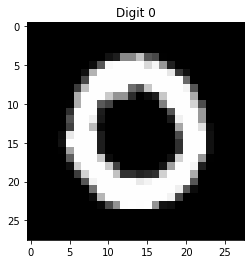

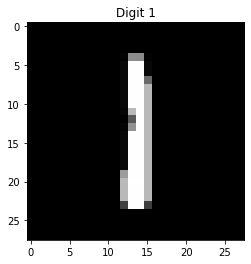

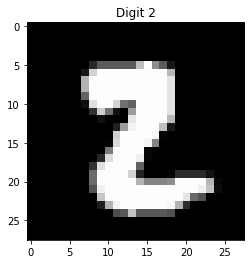

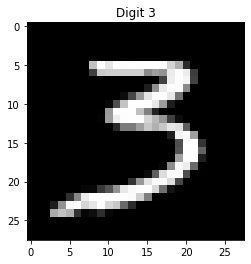

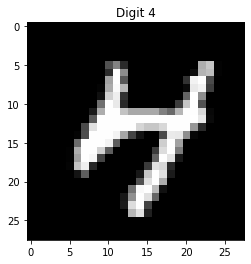

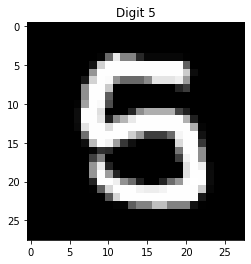

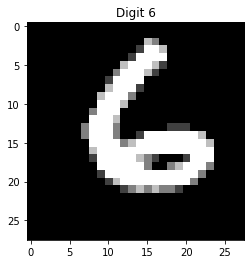

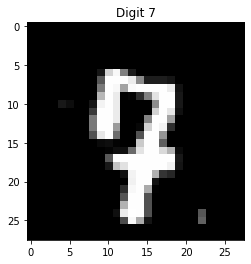

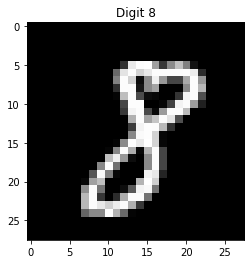

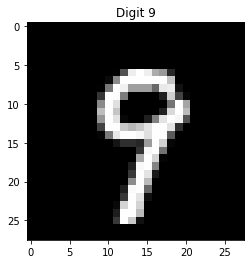

In [3]:
#1.b Display digit images
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

digit = 0
i = 0

while digit < 10:    
    image = mnist_train_df.iloc[i]
    data = image.array
    label = data[0]
    
    if label == digit:
        pixels = data[1:]
        pixels = np.array(pixels, dtype='uint8')
        pixels = pixels.reshape((28,28))
    
        plt.title('Digit {label}'.format(label=label))
        plt.imshow(pixels, cmap='gray')
        plt.show()
        digit+=1
    
    i+=1

## c) Class prior


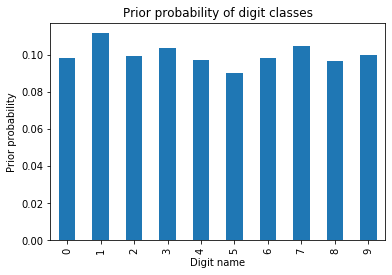

In [5]:
#1.c Class prior
label_count = mnist_train_df['label'].value_counts() #count lables
label_count = label_count.sort_index()
label_prior = mnist_train_df['label'].value_counts(normalize=True)
label_prior = label_prior.sort_index()

label_prior.plot.bar()
plt.title('Prior probability of digit classes')
plt.xlabel('Digit name')
plt.ylabel('Prior probability')
plt.show()

## d) Nearest neighbor

In [7]:
#1.d Nearest neighbor
digits_df = pd.DataFrame(columns=['label','d_index','neighbor_label','neighbor_index','dist'], dtype=object)
digits_df = digits_df.append({'label':0,'d_index':1,'neighbor_label':10,'neighbor_index':0,'dist':99999}, ignore_index=True)
digits_df = digits_df.append({'label':1, 'd_index':2,'neighbor_label':10,'neighbor_index':0,'dist':99999}, ignore_index=True)
digits_df = digits_df.append({'label':2, 'd_index':16,'neighbor_label':10,'neighbor_index':0,'dist':99999}, ignore_index=True)
digits_df = digits_df.append({'label':3, 'd_index':7,'neighbor_label':10,'neighbor_index':0,'dist':99999}, ignore_index=True)
digits_df = digits_df.append({'label':4, 'd_index':3,'neighbor_label':10,'neighbor_index':0,'dist':99999}, ignore_index=True)
digits_df = digits_df.append({'label':5, 'd_index':8,'neighbor_label':10,'neighbor_index':0,'dist':99999}, ignore_index=True)
digits_df = digits_df.append({'label':6, 'd_index':21,'neighbor_label':10,'neighbor_index':0,'dist':99999}, ignore_index=True)
digits_df = digits_df.append({'label':7, 'd_index':18,'neighbor_label':10,'neighbor_index':0,'dist':99999}, ignore_index=True)
digits_df = digits_df.append({'label':8, 'd_index':20,'neighbor_label':10,'neighbor_index':0,'dist':99999}, ignore_index=True)
digits_df = digits_df.append({'label':9, 'd_index':11,'neighbor_label':10,'neighbor_index':0,'dist':99999}, ignore_index=True)

for i in range(0, mnist_train_df.shape[0]):
    neighbor = np.array(mnist_train_df.iloc[i])
    for k in range(0,10):
        d_index = digits_df.iloc[k]['d_index']
        if d_index == i:
            continue
        digit = np.array(mnist_train_df.iloc[d_index])
        dist = np.linalg.norm(digit - neighbor)
        if dist < digits_df.iloc[k]['dist']:
            digits_df.at[k,'dist'] = dist
            digits_df.at[k,'neighbor_index'] = i
            digits_df.at[k,'neighbor_label'] = mnist_train_df.iloc[i]['label']

digits_df

,label,d_index,neighbor_label,neighbor_index,dist
0,0,1,0,12950,1046.6
1,1,2,1,37217,441.011
2,2,16,2,9536,1380.88
3,3,7,5,8981,1832.67
4,4,3,4,14787,1356.88
5,5,8,5,30073,1066.37
6,6,21,6,16240,1446.51
7,7,18,7,25193,761.583
8,8,20,8,15206,1074.05
9,9,11,9,35742,910.577


## e) Pairwise distances of 0 & 1

In [9]:
#1.e Pairwise distances of 0 & 1
import math

zero_one_df = mnist_train_df.loc[mnist_train_df['label'].isin([0,1])]   
zero_one_df = zero_one_df.reset_index(drop=True)
#zero_one_df = zero_one_df.head(100) 
digits_df_e = pd.DataFrame(columns=['label','d_index','neighbor_label','neighbor_index','dist'], dtype=object)
count = zero_one_df.shape[0]

for i in range(0, count):    
    if not(i in zero_one_df.index):
        continue
    
    digits_df_e.at[i,'label'] = zero_one_df.loc[i]['label']
    digits_df_e.at[i,'d_index'] = i  
    digit = np.array(zero_one_df.loc[i])
       
    for k in range(zero_one_df.first_valid_index(), zero_one_df.last_valid_index()+1):
        if (k == i) | (not(k in zero_one_df.index)):
            continue
    
        neighbor = np.array(zero_one_df.loc[k])
        dist = np.linalg.norm(digit - neighbor)
        
        if (dist < digits_df_e.loc[i]['dist']) | (math.isnan(digits_df_e.loc[i]['dist'])):
            digits_df_e.at[i,'dist'] = dist
            digits_df_e.at[i,'neighbor_index'] = k
            digits_df_e.at[i,'neighbor_label'] = zero_one_df.loc[k]['label']
    
    zero_one_df = zero_one_df.drop([i,digits_df_e.loc[i]['neighbor_index']])

digits_df_e

,label,d_index,neighbor_label,neighbor_index,dist
0,1,0,1,6211,489.679
1,0,1,0,2725,1046.6
2,1,2,1,7786,441.011
3,0,3,0,71,1177.1
4,0,4,0,5273,856.143
5,1,5,1,6252,564.323
6,1,6,1,4977,382.029
7,0,7,0,6428,856.566
8,0,8,0,255,1317.24
9,1,9,1,6761,539.286


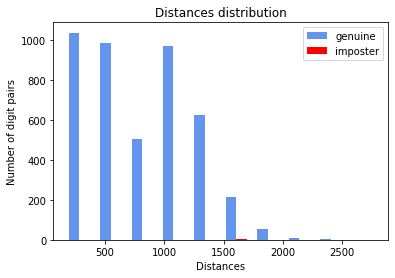

In [11]:
#plot histogram
impostor_distances = digits_df_e.loc[digits_df_e['label'] != digits_df_e['neighbor_label']]
genuine_distances = digits_df_e.loc[digits_df_e['label'] == digits_df_e['neighbor_label']]

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(genuine_distances['dist'])
b_heights, b_bins = np.histogram(impostor_distances['dist'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue', label='genuine')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='red', label='imposter')
ax.legend() 

plt.title('Distances distribution')
plt.xlabel('Distances')
plt.ylabel('Number of digit pairs')
plt.show() 

## f) ROC curve

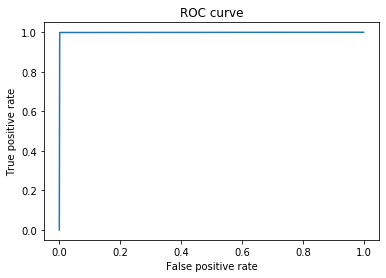

In [15]:
#1.f ROC curve
true_positive = genuine_distances.shape[0] / digits_df_e.shape[0]
false_positive = impostor_distances.shape[0] / digits_df_e.shape[0]

x = [0,false_positive,1]
y = [0,true_positive,1]

plt.plot(x,y)
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show() 

## g) Implement KNN classifier 

In [29]:
#1.g Implement K-NN classifier
def zwee_knn (train_df,test_df,mode,kdtree_max_level):
    global kd_tree
    global digits_df_g
        
    pixel_train_df = train_df.drop('label', axis=1)
    
    # first we will try to implement a K-d tree data structure to speed up KNN search, 
    # as seen in this article: https://ashokharnal.wordpress.com/2015/01/20/a-working-example-of-k-d-tree-formation-and-k-nearest-neighbor-algorithms/
    # The K-d tree tries to divide the dataset into several "leaves", or clusters of similar records.
    # Then to find the nearest neighbor, we just need calculate the distances within a cluster, instead of the whole dataset
    def create_kdtree (parent_id, parent_df, previous_split_columns, tree_current_level, tree_max_level):
        global kd_tree
        variances = parent_df.drop(previous_split_columns, axis=1).var() # find variances of all columns
        split_column = variances.idxmax() # we will split the data set using the column with highest variances
        previous_split_columns = np.append(previous_split_columns, split_column)
        parent_df = parent_df.sort_values(by=split_column) #sort the dataframe by the split_column
        median_value = parent_df[split_column].median() #median of split_column
        
        # split the data set by the median of split_column
        small_df = parent_df.head(int(len(parent_df)/2)) #contains smaller rows
        large_df = parent_df.tail(int(len(parent_df)/2)) #contains larger rows
        
        # record the 2 splitted data set as 2 tree branches
        tree_current_level += 1
        if tree_current_level >= tree_max_level: #we reach the end of the tree
            #append the leaves and add mnist_rows, which is the records in MNIST data sets that this leaf contains
            kd_tree = kd_tree.append({'branch_id':parent_id+'s','bottom':True,'split_column':split_column,'split_value':median_value, 'mnist_rows':np.array(small_df.index.values)}, ignore_index=True) #tree branch with smaller rows, append s (small) to id
            kd_tree = kd_tree.append({'branch_id':parent_id+'l','bottom':True,'split_column':split_column,'split_value':median_value, 'mnist_rows':np.array(large_df.index.values)}, ignore_index=True) #tree branch with larger rows, append l (large) to id
            return kd_tree
        else:
            kd_tree = kd_tree.append({'branch_id':parent_id+'s','bottom':False,'split_column':split_column,'split_value':median_value}, ignore_index=True)
            kd_tree = kd_tree.append({'branch_id':parent_id+'l','bottom':False,'split_column':split_column,'split_value':median_value}, ignore_index=True)
            create_kdtree (parent_id+'s', small_df, previous_split_columns, tree_current_level, tree_max_level)
            create_kdtree (parent_id+'l', large_df, previous_split_columns, tree_current_level, tree_max_level)
    
    kd_tree = pd.DataFrame(columns=['branch_id','bottom','split_column','split_value','mnist_rows',], dtype=object)        
    previous_split_columns = np.array([])
    parent_id = ''
    parent_df = pixel_train_df
    tree_max_level = kdtree_max_level
    tree_current_level = 0
    
    create_kdtree(parent_id, parent_df, previous_split_columns, tree_current_level, tree_max_level)
    
    # Next, to find the nearest neighbor of any record, we will first put that record into a proper leaf in the K-d tree.
    # Then we will only need to calculate the distances among the records within that leaf
    digits_df_g = pd.DataFrame(columns=['label','d_index','neighbor_label','neighbor_index','dist','branch_id'], dtype=object)
    
    
    for i in test_df.index:
        #print('i',i)
        digit = test_df.loc[i] #the digit that we are trying to classify
        if mode == 'train':
            digits_df_g = digits_df_g.append({'label':digit['label'],'d_index':i,'branch_id':'z'}, ignore_index=True)
        elif mode == 'test':
            digits_df_g = digits_df_g.append({'d_index':i,'branch_id':'z'}, ignore_index=True)
        
        branch_id = 's' #start at root branch
        bottom = kd_tree.loc[kd_tree['branch_id'] == branch_id,'bottom'].values[0] #whether this is the bottom leaf
        
        while not bottom: # if we haven't reached the bottom leaf yet, keep searching
            split_column = kd_tree.loc[kd_tree['branch_id'] == branch_id,'split_column']
            split_value = kd_tree.loc[kd_tree['branch_id'] == branch_id,'split_value'].values[0]
            
            if digit[split_column].values[0] > split_value:
                branch_id = branch_id + 'l' # we will search for the larger branch next, thus append `l` to branch_id
            else:
                branch_id = branch_id + 's' # we will search for the smaller branch next, thus append `l` to branch_id
            #print('Branch',branch_id)
            bottom = kd_tree.loc[kd_tree['branch_id'] == branch_id,'bottom'].values[0]
            
        # after we reach a bottom leaf, we will calculate L2 norm with the records in that leaf to find the nearest neighbor
        digit_index = digits_df_g.loc[digits_df_g['d_index'] == i].index.values[0]
        digits_df_g.at[digit_index,'branch_id'] = branch_id
        mnist_rows = kd_tree.loc[kd_tree['branch_id'] == branch_id,'mnist_rows'].values[0] #the rows in MNIST training data set that this leaf contains
        
        for k in mnist_rows:
            if k == digit.name:
                continue
            
            if mode == 'train':
                my_digit = np.array(digit.iloc[1:])
            elif mode == 'test':
                my_digit = np.array(digit)
                
            neighbor = np.array(pixel_train_df.loc[k])
            dist = np.linalg.norm(my_digit - neighbor)                
            my_digit_dist = digits_df_g.loc[digit_index]['dist']
            
            if (dist < my_digit_dist) | math.isnan(my_digit_dist):
                digits_df_g.at[digit_index,'dist'] = dist
                digits_df_g.at[digit_index,'neighbor_index'] = k
                digits_df_g.at[digit_index,'neighbor_label'] = train_df.loc[k]['label']
    
    if mode == 'train':
        #check accuracy of the model
        impostor_distances = digits_df_g.loc[digits_df_g['label'] != digits_df_g['neighbor_label']]
        genuine_distances = digits_df_g.loc[digits_df_g['label'] == digits_df_g['neighbor_label']]
        
        true_positive = genuine_distances.shape[0] / digits_df_g.shape[0]
        false_positive = impostor_distances.shape[0] / digits_df_g.shape[0]
        
        #plot ROC
        x = [0,false_positive,1]
        y = [0,true_positive,1]
        
        plt.plot(x,y)
        plt.title('ROC curve')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.show() 
        
        return true_positive
    
    elif mode == 'test':
        return True


## h) Tri-fold cross-validation

start running


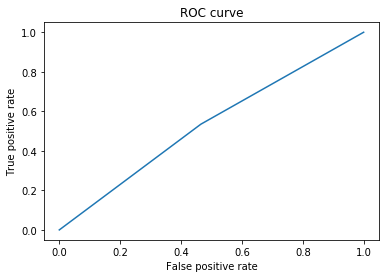

finish 1


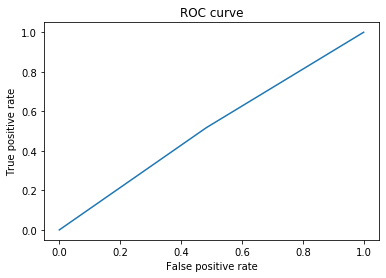

finish 2


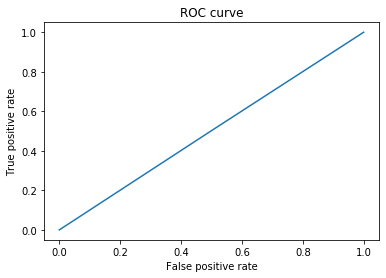

finish 3
Average accuracy: 0.5176666666666666


In [30]:
test_df1 = mnist_train_df.sample(14000)
train_df1 = mnist_train_df[~mnist_train_df.isin(test_df1)].dropna()
test_df2 = train_df1.sample(14000)
train_df2 = mnist_train_df[~mnist_train_df.isin(test_df2)].dropna()
test_df3 = train_df1[~train_df1.isin(test_df2)].dropna()
train_df3 = mnist_train_df[~mnist_train_df.isin(test_df3)].dropna()

print("start running")
accuracy_1 = zwee_knn (train_df1,test_df1,'train',5) 
digits_df_1 = digits_df_g
print("finish 1")
accuracy_2 = zwee_knn (train_df2,test_df2,'train',5) 
digits_df_2 = digits_df_g
print("finish 2")
accuracy_3 = zwee_knn (train_df3,test_df3,'train',5) 
digits_df_3 = digits_df_g
print("finish 3")

avg_accuracy = (accuracy_1 + accuracy_2 + accuracy_3)/3
print ("Average accuracy:",avg_accuracy)

## i) Confusion matrix

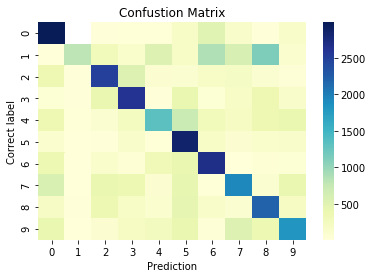

In [31]:
#1.i Confusion matrix
import seaborn as sns

#combine the 3 results from tri-fold cross validation
digits_df_3fold = pd.concat([digits_df_1,digits_df_2,digits_df_3])
digits_df_3fold = digits_df_3fold.loc[:,['label','neighbor_label','dist']]
digits_df_3fold = digits_df_3fold.astype(int)
digits_df_3fold = digits_df_3fold.astype(str)
digits_df_3fold = digits_df_3fold.groupby(['label','neighbor_label']).size().to_frame(name ='count').reset_index()
digits_df_3fold = digits_df_3fold.pivot('label','neighbor_label','count')

ax = sns.heatmap(digits_df_3fold,cmap="YlGnBu")
plt.title('Confustion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Correct label')
plt.show() 

## j) Kaggle submission

In [ ]:
#1.j Kaggle test
zwee_knn (mnist_train_df, mnist_test_df,'test',6)
digits_df_final = digits_df_g

final_result = digits_df_final.loc[:,['d_index','neighbor_label']]
final_result['d_index'] = final_result['d_index'].apply(lambda x: x + 1)
final_result.to_csv(index=False, header=True, path_or_buf="/Users/zweedaothaiduy/Downloads/zwee_submission.csv")